A PowerPoint presentation outlining your statistical question/hypothesis
    
    X A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).
    
    - Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
    
    - Describe what the 5 variables mean in the dataset (Chapter 1).
    
    X Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
    
    X Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
    
    X Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

    X Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

    X Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

    X Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

    X Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

    X For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

Your code or screenshots of your code
    
    - A 250-500-word paper summarizing the following: Statistical/Hypothetical Question
    
    - Outcome of your EDA
    
    - What do you feel was missed during the analysis?
    
    - Were there any variables you felt could have helped in the analysis?
    
    - Were there any assumptions made you felt were incorrect?
    
    - What challenges did you face, what did you not fully understand?
    
    - Submit a link to your repository to the assignment link during the final week of class.

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import warnings
import math
import matplotlib as plt
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

def Summarize(df, column, title):
    """Print summary statistics male, female and all."""

    items = [
        ('All Yrs', df[column]),
        ('2021', df[(df.Wave == 1) | (df.Wave == 2)][column]),
        ('2022', df[(df.Wave == 3) | (df.Wave == 4)][column]),
        ('2023', df[(df.Wave == 5) | (df.Wave == 6)][column]),
        ('2024', df[(df.Wave == 7) | (df.Wave == 8)][column]),
        ]

    print(title)
    print('key\tn\tmean\tmode\tvar\tstd\tcv')
    for key, series in items:
        mean, var, mode = series.mean(), series.var(), series.mode()
        std = math.sqrt(var)
        cv = std / mean
        t = key, len(series), mean, mode, var, std, cv
        print('%s\t%d\t%4.2f\t%4.2f\t%4.2f\t%4.2f\t%4.4f' % t)

# Collect and Format Data

datain = []
datain.append(pd.read_csv("TermProjectFull.s24mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s23mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s22mri.csv.zip"))
datain.append(pd.read_csv("TermProjectFull.s21mri.csv.zip"))
first = pd.concat(datain)
labels = first.columns[7:]
dataindex = pd.DataFrame()
dataindex["Label"] = labels
columns = []
for i in range(1,126):
    columns.append("X" + str(i))
dataindex["Code"] = columns
dataindex = dataindex.set_index("Code")

data = pd.DataFrame()
data["RespID"] = first.RespID
columns = ["RespID","Health","HHI","Love","Faith","Happy","Politics"]
for i in range(1,126):
    columns.append("X" + str(i))
first.columns = columns
rest = ""
for i in range(2,126):
    rest += (" + X" + str(i))

first["HHIOctile"] = 0
octile = np.quantile(first["HHI"],[x/8 for x in range(1,8)])
first.HHIOctile[first["HHI"] < octile[0]] = 1
for x in range(0,6):
    first.HHIOctile[(first["HHI"] >= octile[x]) & (first["HHI"] < octile[x+1])] = x+2
first.HHIOctile[first["HHI"] >= octile[6]] = 8

formula = "Health ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Health:\n", final.nlargest(5,"Coef"))
data["Health"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[2:6]:
    data["Health"] += first[cur]

formula = "HHIOctile ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Wealth:\n", final.nlargest(5,"Coef"))
data["Wealth"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[2:6]:
    data["Wealth"] += first[cur]

formula = "Love ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Love:\n", final.nlargest(5,"Coef"))
data["Love"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[2:6]:
    data["Love"] += first[cur]

formula = "Faith ~ X1 " + rest
model = smf.ols(formula, data=first)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print("Faith:\n", final.nlargest(5,"Coef"))
data["Faith"] = 0
for cur in final.nlargest(5,"Coef").index.tolist()[2:6]:
    data["Faith"] += first[cur]


Health:
           Coef                                              Label
X101  0.080299        I make sure I take time for myself each day
X80   0.074765  Keeping a neat, organized home is a top priori...
X42   0.066211     I have a better fashion sense than most people
X82   0.053597  I feel I am more environmentally conscious tha...
X103  0.052898  I often choose methods of transportation that ...
Wealth:
           Coef                                              Label
X113  0.363950  I consider my work to be a career, not just a job
X44   0.207292                 I am more capable than most people
X1    0.165013             I enjoy entertaining people in my home
X19   0.149750  My friends and acquaintances look to me to org...
X72   0.140639       I often find myself in a leadership position
Love:
           Coef                                              Label
X99   0.202690  I frequently wish I had more time to spend wit...
X84   0.091593     I often indulge my children with

In [2]:
data["Wave"] = [int(x)-81 for x in first["RespID"].str[:2]]
data["Happy"] = first["Happy"]
data["Politics"] = first["Politics"]

print(data.head(10))

            RespID  Health  Wealth  Love  Faith  Wave  Happy  Politics
0  89001W8912BZDMB       9       9     9      9     8      3         3
1  89001W8912FJZA1       7      10     8     10     8      4         1
2  89001W8912NWF3E       6       6     6      3     8      3         1
3  89001W8913R7HJS       7       8     8      8     8      3         4
4  89001W8913TWRA6       9       9     9      8     8      2         3
5  89001W8913VMQM9       7       4     7      3     8      3         3
6  89001W8913YV4PR       7       5     9     10     8      3         5
7  89001W8919HSVDN       6       6     5      3     8      3         3
8  89001W891AAM1G5      10      10     4      7     8      4         3
9  89001W891ABWDW1      10      11    10     10     8      4         3


### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). {-}

Satisfied with my Weight:
key	n	mean	mode	var	std	cv
All Yrs	201216	6.64	6.00	3.59	1.90	0.2855
2021	23964	6.76	7.00	2.58	1.61	0.2377
2022	48668	6.61	6.00	3.58	1.89	0.2859
2023	51409	6.64	6.00	3.75	1.94	0.2914
2024	51480	6.60	6.00	3.80	1.95	0.2954


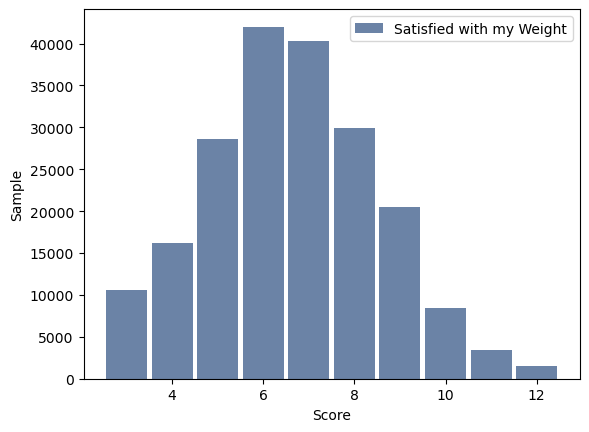

<Figure size 800x600 with 0 Axes>

In [3]:
# Histograms of Health
Summarize(data,"Health","Satisfied with my Weight:")
hist = thinkstats2.Hist(data.Health, label='Satisfied with my Weight')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Annual Household Income:
key	n	mean	mode	var	std	cv
All Yrs	201216	7.72	8.00	3.77	1.94	0.2513
2021	23964	7.86	8.00	2.99	1.73	0.2201
2022	48668	7.78	8.00	3.73	1.93	0.2485
2023	51409	7.68	8.00	3.94	1.98	0.2585
2024	51480	7.64	8.00	3.85	1.96	0.2566


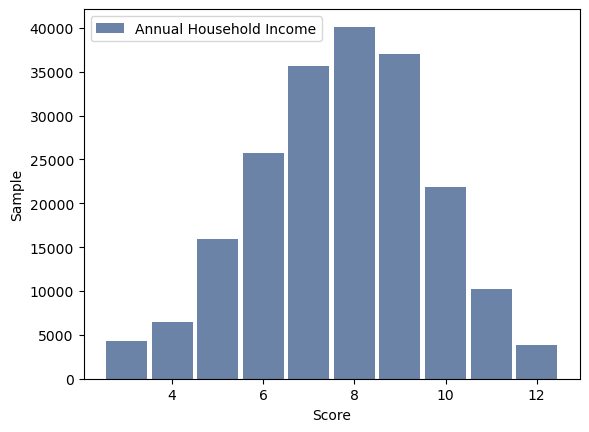

<Figure size 800x600 with 0 Axes>

In [4]:
# Histograms of HHI

Summarize(data,"Wealth","Annual Household Income:")
hist = thinkstats2.Hist(data.Wealth, label='Annual Household Income')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

My Friends are as Important as My Family:
key	n	mean	mode	var	std	cv
All Yrs	201216	8.45	9.00	3.30	1.82	0.2152
2021	23964	8.47	9.00	3.13	1.77	0.2089
2022	48668	8.48	9.00	3.22	1.80	0.2117
2023	51409	8.44	9.00	3.37	1.84	0.2175
2024	51480	8.42	9.00	3.34	1.83	0.2169


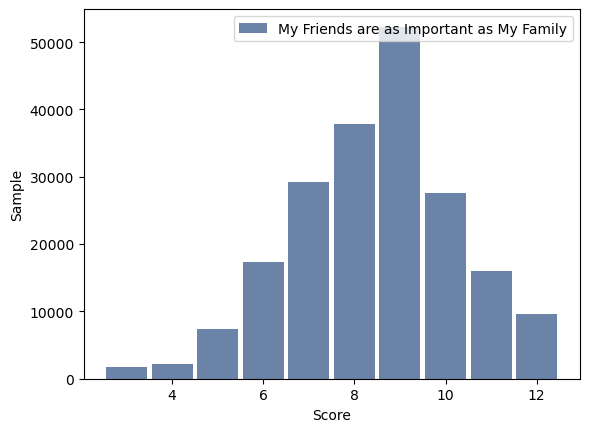

<Figure size 800x600 with 0 Axes>

In [5]:
# Histograms of Love

Summarize(data,"Love","My Friends are as Important as My Family:")
hist = thinkstats2.Hist(data.Love, label='My Friends are as Important as My Family')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Faith: Hold to Religious Belief:
key	n	mean	mode	var	std	cv
All Yrs	201216	7.32	9.00	7.73	2.78	0.3802
2021	23964	7.28	6.00	5.86	2.42	0.3324
2022	48668	7.29	3.00	8.15	2.85	0.3915
2023	51409	7.28	3.00	7.99	2.83	0.3883
2024	51480	7.35	3.00	7.90	2.81	0.3827


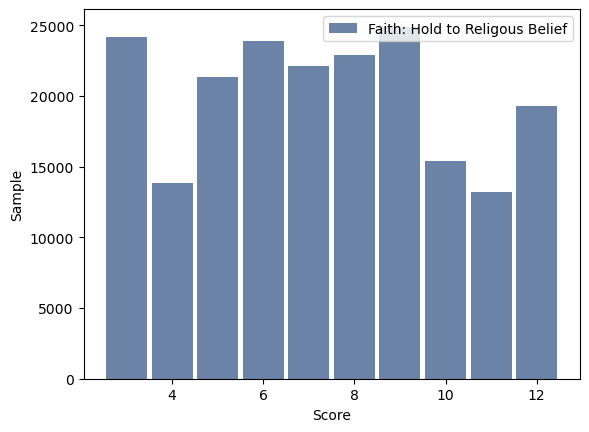

<Figure size 800x600 with 0 Axes>

In [6]:
# Histograms of Health

Summarize(data,"Faith","Faith: Hold to Religious Belief:")
hist = thinkstats2.Hist(data.Faith, label='Faith: Hold to Religous Belief')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Sample')

Happy with my Standard of Living:
key	n	mean	mode	var	std	cv
All Yrs	201216	3.07	3.00	0.64	0.80	0.2609
2021	23964	3.13	3.00	0.56	0.75	0.2392
2022	48668	3.12	3.00	0.60	0.77	0.2478
2023	51409	3.06	3.00	0.66	0.81	0.2660
2024	51480	3.03	3.00	0.67	0.82	0.2704


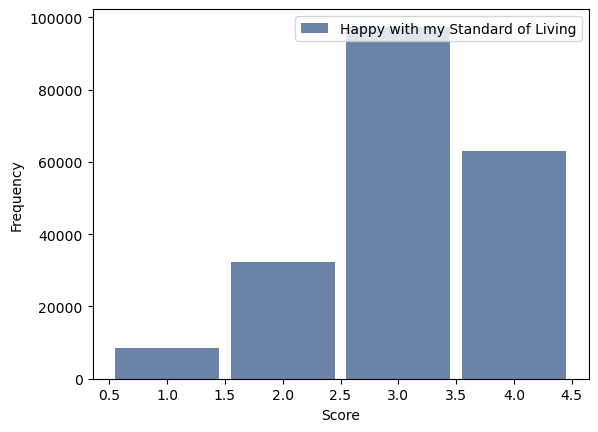

<Figure size 800x600 with 0 Axes>

In [7]:
# Histograms of Health

Summarize(data,"Happy","Happy with my Standard of Living:")
hist = thinkstats2.Hist(data.Happy, label='Happy with my Standard of Living')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

Health+Wealth+Love+Faith Score:
key	n	mean	mode	var	std	cv
All Yrs	201216	30.12	30.00	28.18	5.31	0.1762
2021	23964	30.38	30.00	19.10	4.37	0.1439
2022	48668	30.16	30.00	28.37	5.33	0.1766
2023	51409	30.04	31.00	29.75	5.45	0.1816
2024	51480	30.02	31.00	29.52	5.43	0.1810


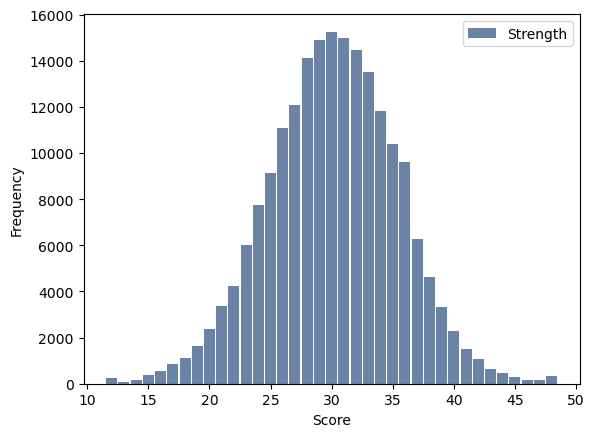

<Figure size 800x600 with 0 Axes>

In [8]:
data["strength"] = data.Health + data.Wealth + data.Love + data.Faith
Summarize(data,"strength","Health+Wealth+Love+Faith Score:")
hist = thinkstats2.Hist(data.strength, label='Strength')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

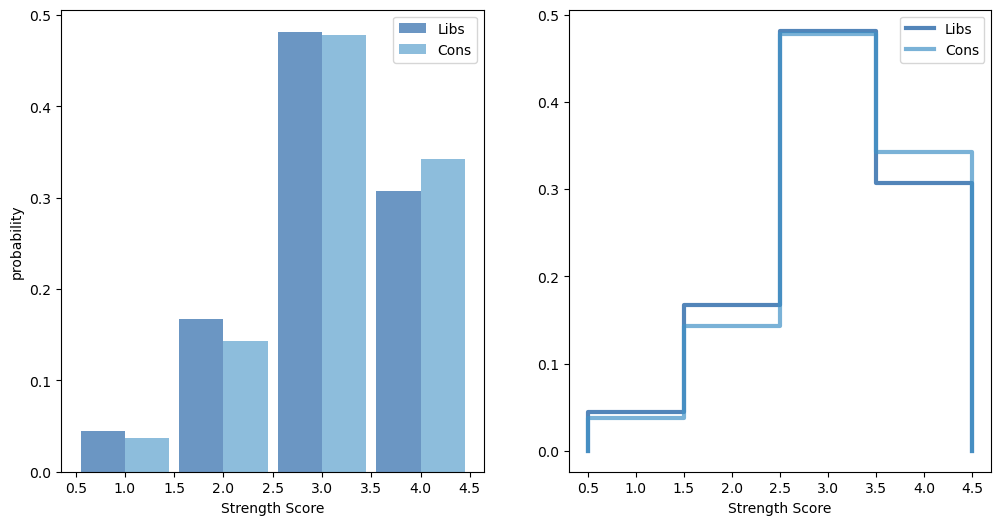

<Figure size 800x600 with 0 Axes>

In [9]:
first_pmf = thinkstats2.Pmf(data[data.Politics > 3 ].Happy, label="Libs")
other_pmf = thinkstats2.Pmf(data[data.Politics < 3].Happy, label="Cons")

width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width, label = "Libs")
thinkplot.Hist(other_pmf, align='left', width=width, label = "Cons")
thinkplot.Config(xlabel='Strength Score', ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf]) 
thinkplot.Show(xlabel='Strength Score')

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

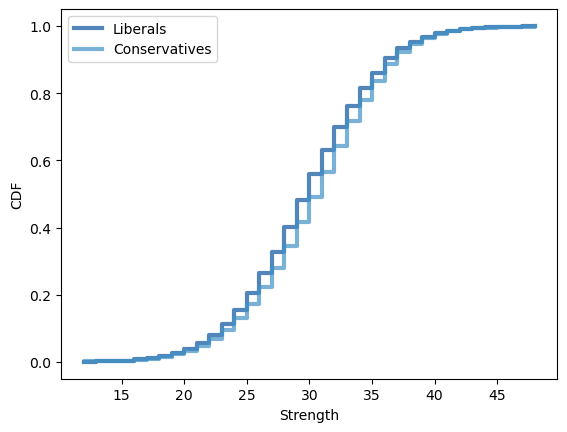

<Figure size 800x600 with 0 Axes>

In [10]:
first_cdf = thinkstats2.Cdf(data[data.Politics > 3 ].strength, label="Liberals")
other_cdf = thinkstats2.Cdf(data[data.Politics < 3 ].strength, label="Conservatives")
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot. Show(xlabel='Strength', ylabel='CDF')

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). {-}

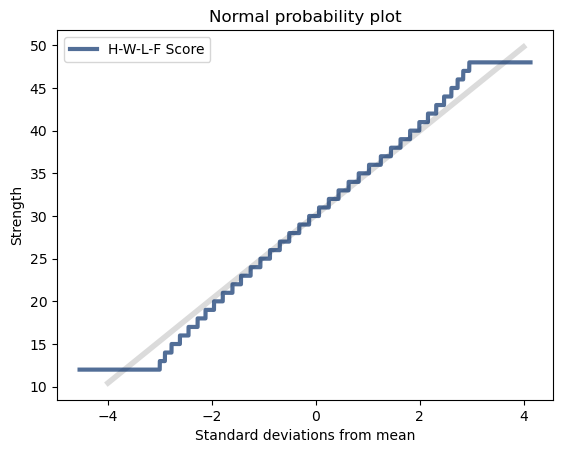

In [11]:
mean, var = thinkstats2.TrimmedMeanVar(data.strength, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(data.strength)
thinkplot.Plot(xs, ys, label="H-W-L-F Score")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Strength",
)

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7). {-}

Correlation: 0.1506
Spearmans Corr: 0.1298


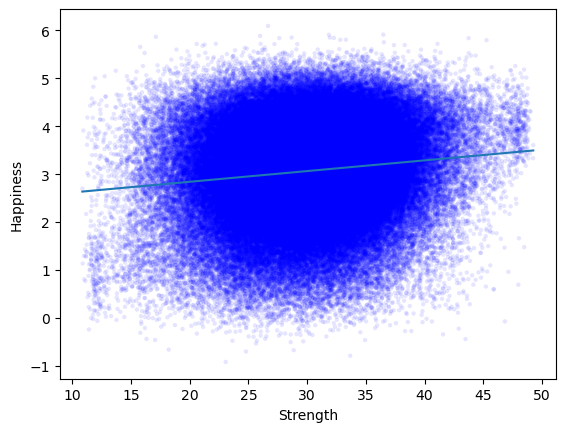

In [12]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
    
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print(f"Correlation: {Corr(data.strength,data.Happy):.4f}\nSpearmans Corr: {SpearmanCorr(data.strength,data.Happy):.4f}")
xs = [-4, 4]
jstrength, jhappy = Jitter(data.strength), Jitter(data.Happy)
bins = np.arange(0, 20, 1)
indices = np.digitize(jstrength, bins)
groups = data.groupby(indices)
mean_strengths = [jstrength.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(jhappy) for i, group in groups]
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_strengths, weight_percentiles, label=label)

thinkplot.Scatter(jstrength, jhappy, alpha=0.1, s=10)
plt.plot(np.unique(jstrength), np.poly1d(np.polyfit(jstrength, jhappy, 1))(np.unique(jstrength)))
thinkplot.Config(xlabel='Strength',
                 ylabel='Happiness',
                 legend=False)

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9. {-}

0.003


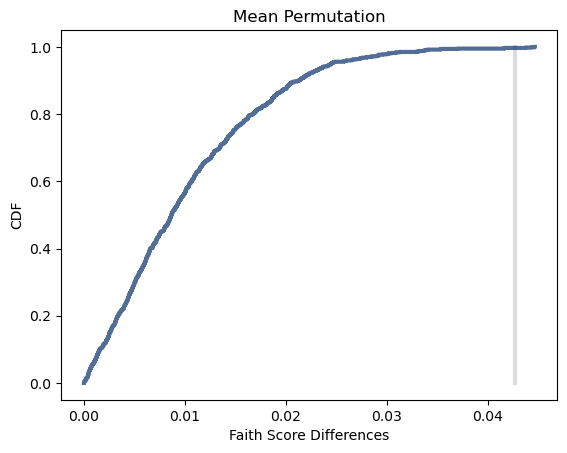

<Figure size 800x600 with 0 Axes>

In [40]:
import math

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Later = data.Faith[data.Wave >=5]
Early = data.Faith[data.Wave < 5]
hdata = Early, Later
ht = DiffMeansPermute(hdata)
pvalue = ht.PValue()

print(pvalue)
ht.PlotCdf()
thinkplot.Show(title="Mean Permutation", xlabel='Faith Score Differences', ylabel='CDF')

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). {-}

In [51]:
formula = 'Happy ~ Health + Wealth + Love + Faith'
model = smf.ols(formula, data=data)
results = model.fit()
resframe = pd.DataFrame(results.params)
resframe.columns = ["Coef"]
print(resframe)
print(results.summary())

allq = pd.DataFrame(first["X1"])
allq["Happy"] = first.Happy
formula = 'Happy ~ X1'
for i in range(2,126):
    allq["X"+str(i)] = first["X"+str(i)]
    formula += (" + X" + str(i))

model = smf.ols(formula, data=allq)
results = model.fit()
resframe = pd.DataFrame(results.params)
final = pd.merge(resframe, dataindex, left_index=True, right_index=True, how='inner')
final.columns = ["Coef","Label"]
print(final.nlargest(5,"Coef"))
print(results.summary())

               Coef
Intercept  2.365276
Health    -0.016752
Wealth     0.071035
Love       0.016953
Faith      0.016567
                            OLS Regression Results                            
Dep. Variable:                  Happy   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2026.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:26:23   Log-Likelihood:            -2.3667e+05
No. Observations:              201216   AIC:                         4.733e+05
Df Residuals:                  201211   BIC:                         4.734e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------